Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car_data.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl/kmpkg),engine(CC),max_power(bhp),seats
8123,Hyundaii20Magna,2013,320000,110000,Petrol,Individual,Manual,FirstOwner,18.50,1197.0,82.85,5.0
8124,HyundaiVernaCRDiSX,2007,135000,119000,Diesel,Individual,Manual,Fourth&AboveOwner,16.80,1493.0,110.00,5.0
8125,MarutiSwiftDzireZDi,2009,382000,120000,Diesel,Individual,Manual,FirstOwner,19.30,1248.0,73.90,5.0
8126,TataIndigoCR4,2013,290000,25000,Diesel,Individual,Manual,FirstOwner,23.57,1396.0,70.00,5.0
8127,TataIndigoCR4,2013,290000,25000,Diesel,Individual,Manual,FirstOwner,23.57,1396.0,70.00,5.0


In [5]:
# checking the number of rows and columns
car_dataset.shape

(8128, 12)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 8128 non-null   object 
 1   year                 8128 non-null   int64  
 2   selling_price        8128 non-null   int64  
 3   km_driven            8128 non-null   int64  
 4   fuel                 8128 non-null   object 
 5   seller_type          8128 non-null   object 
 6   transmission         8128 non-null   object 
 7   owner                8128 non-null   object 
 8   mileage(kmpl/kmpkg)  7907 non-null   float64
 9   engine(CC)           7907 non-null   float64
 10  max_power(bhp)       7912 non-null   float64
 11  seats                7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

name                     0
year                     0
selling_price            0
km_driven                0
fuel                     0
seller_type              0
transmission             0
owner                    0
mileage(kmpl/kmpkg)    221
engine(CC)             221
max_power(bhp)         216
seats                  221
dtype: int64

In [28]:
car_dataset=car_dataset.dropna()

In [29]:
car_dataset.isnull().sum()

name                   0
year                   0
selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage(kmpl/kmpkg)    0
engine(CC)             0
max_power(bhp)         0
seats                  0
dtype: int64

In [30]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())



1    4299
0    3520
2      52
3      35
Name: fuel, dtype: int64
1    6563
0    1343
Name: seller_type, dtype: int64
0    6865
1    1041
Name: transmission, dtype: int64
0    5220
1    2016
2     510
3     160
Name: owner, dtype: int64


Encoding the Categorical Data

In [31]:
# encoding "Fuel_Type" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "Owner" Column
car_dataset.replace({'owner':{'FirstOwner':0,'SecondOwner':1,'ThirdOwner':2,'Fourth&AboveOwner':3}},inplace=True)



TypeError: ignored

In [32]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl/kmpkg),engine(CC),max_power(bhp),seats
0,MarutiSwiftDzireVDI,2014,450000,145500,1,1,0,0,23.40,1248.0,74.00,5.0
1,SkodaRapid1.5TDIAmbition,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,HondaCity2017-2020EXi,2006,158000,140000,0,1,0,2,17.70,1497.0,78.00,5.0
3,Hyundaii20SportzDiesel,2010,225000,127000,1,1,0,0,23.00,1396.0,90.00,5.0
4,MarutiSwiftVXIBSIII,2007,130000,120000,0,1,0,0,16.10,1298.0,88.20,5.0


Splitting the data and Target

In [33]:
X = car_dataset.drop(['name','selling_price','seats'],axis=1)
Y = car_dataset['selling_price']

In [34]:
print(X)

      year  km_driven  fuel  ...  mileage(kmpl/kmpkg)  engine(CC)  max_power(bhp)
0     2014     145500     1  ...                23.40      1248.0           74.00
1     2014     120000     1  ...                21.14      1498.0          103.52
2     2006     140000     0  ...                17.70      1497.0           78.00
3     2010     127000     1  ...                23.00      1396.0           90.00
4     2007     120000     0  ...                16.10      1298.0           88.20
...    ...        ...   ...  ...                  ...         ...             ...
8123  2013     110000     0  ...                18.50      1197.0           82.85
8124  2007     119000     1  ...                16.80      1493.0          110.00
8125  2009     120000     1  ...                19.30      1248.0           73.90
8126  2013      25000     1  ...                23.57      1396.0           70.00
8127  2013      25000     1  ...                23.57      1396.0           70.00

[7906 rows x 9 

In [35]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7906, dtype: int64


Splitting Training and Test data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [37]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [38]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [39]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [40]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6735307291980761


Visualize the actual prices and Predicted prices

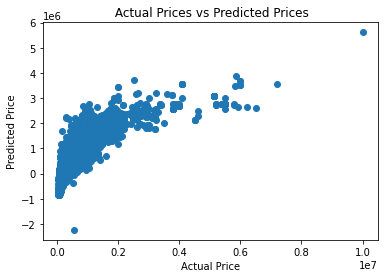

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [42]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [43]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6835445028938293


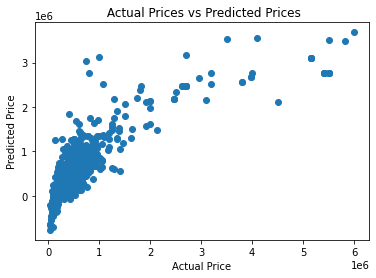

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [45]:
# loading the linear regression model
lass_reg_model = Lasso()

In [46]:
lass_reg_model.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evaluation

In [47]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [48]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6735307291569504


Visualize the actual prices and Predicted prices

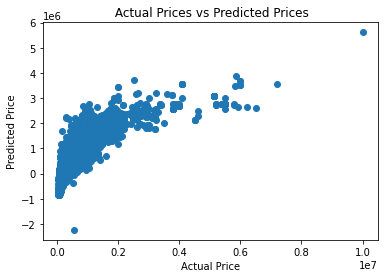

In [49]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [50]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [51]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6835438824063625


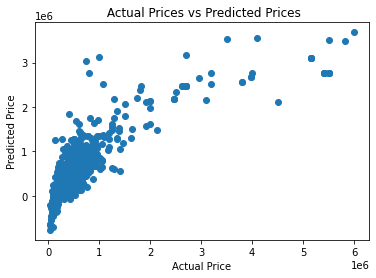

In [52]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()